# Random walk
In time seies, a *random walk* is a series whose first difference is **stationary** and **uncorrelated**.

Here, we are going to create a random walk time series to analyze the above statement. The process to follow is:
- Creating the time series with uniform random numbers.
- Testing for stationary (using ADF test to verufy the null hypothesis).
- Testing autocorrelation (using ACF).

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# 1. Time series data

In [2]:
# setting a seed
np.random.seed(42)

# number of steps
steps = np.random.standard_normal(1000)
steps[0] = 0 # setting first step in zero 

random_walk = np.cumsum(steps) # creating time series taking into account previous step

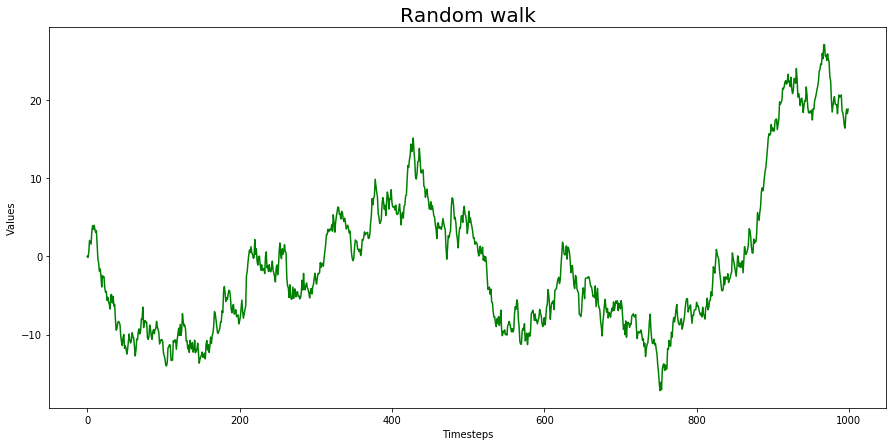

In [29]:
# plotting time series
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(random_walk, color='g')
ax.set(xlabel='Timesteps', ylabel='Values', title = 'Random walk')
ax.title.set_size(20)

plt.show()

## 2. Testing stationary and autocorrelation to the original data
In order to test stationary, we'll use  **Augmented Dickey-Fuller (ADF) test**. This test evaluates the nule hypothesis of the presence of unit root in the time series. If there nule hypothesis is true, the time series is not stationary, so it is necessary to applied transformations. Let's apply the test to get the *p-values*.

In [30]:
ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.965952487691875
p-value: 0.7654789696692581


Besides, we're going to apply the Autocorrelation Function (ACF) to get the autocorrelation coefficients and observe their behavior.

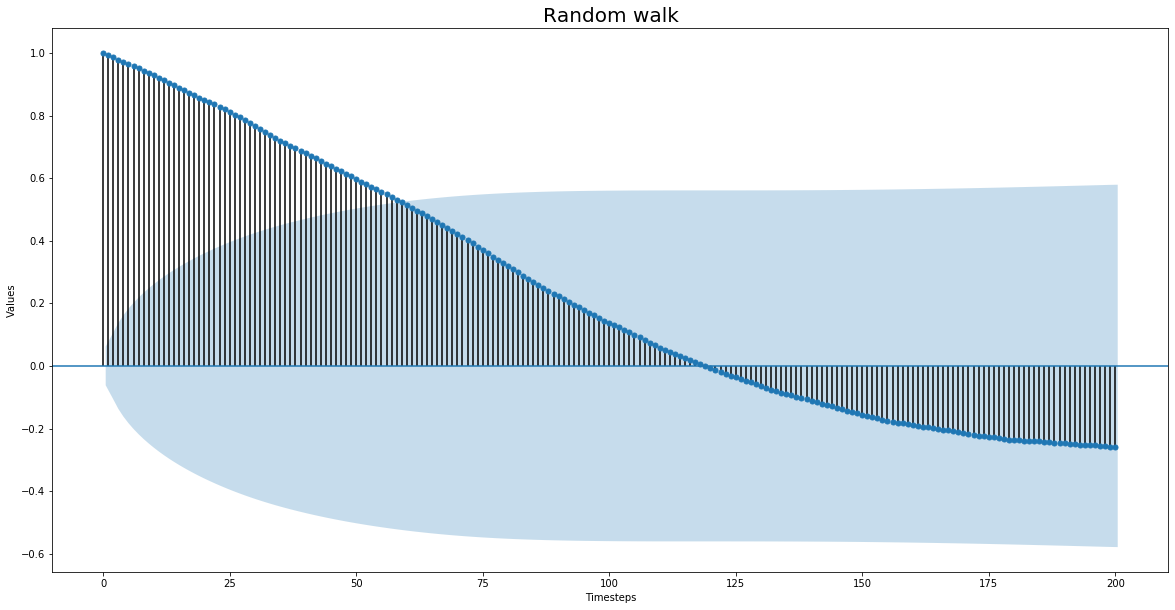

In [45]:
n_coef = 200

fig, ax = plt.subplots(figsize=(20,10))

# applying ACF
plot_acf(random_walk, ax=ax, lags=n_coef)
ax.set(xlabel='Timesteps', ylabel='Values', title = 'Random walk')
ax.title.set_size(20)
plt.show()

In summary,the *p-value* is greater that the significance of 0.05. It is necessary to applied a transformation to the data. Let's use difference method. Also, the data has a high correlation because many coefficients overpass the blue-shadow.

## 3. Difference transformation.

In [46]:
# getting differences
n_differences = 1 # number of differences (order)
diff_random_walk = np.diff(random_walk, n=n_differences)

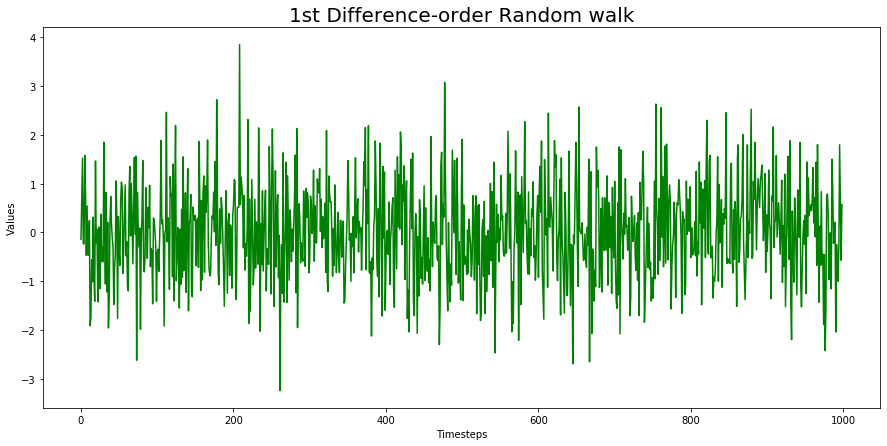

In [47]:
# plotting time series
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(diff_random_walk, color='g')
ax.set(xlabel='Timesteps', ylabel='Values', title = '1st Difference-order Random walk')
ax.title.set_size(20)

plt.show()

This transformation removed the trend, and the variance seems more constant.

## 4. Testing stationary and autocorrelation to the 1st Difference-order data
Let's repeat the process of the second part applied to the data transformed.

In [48]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -31.7893108575606
p-value: 0.0


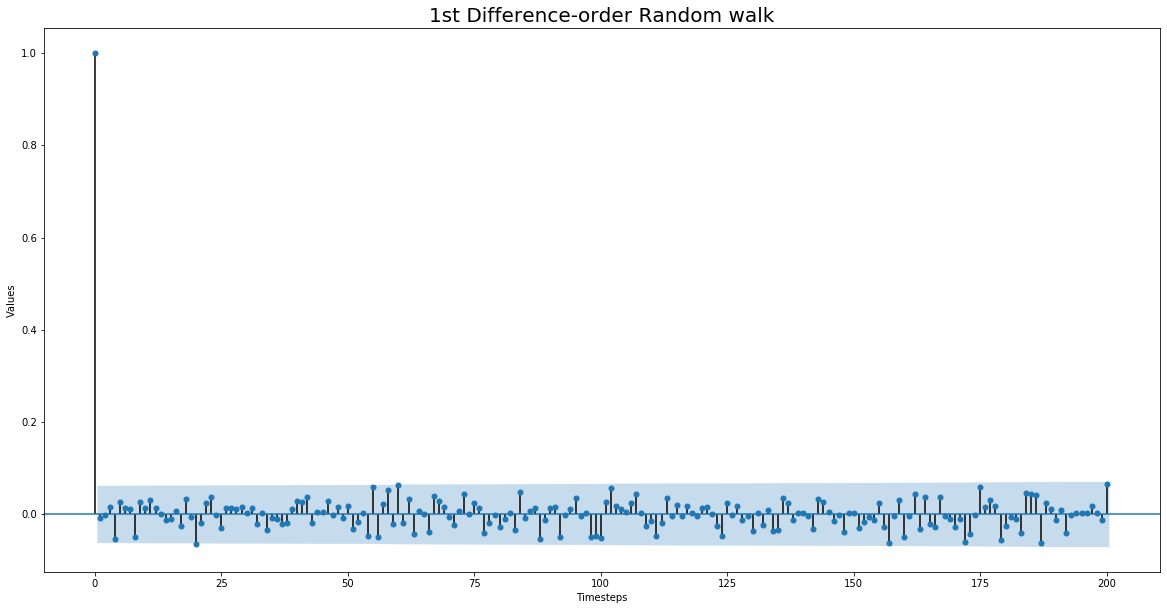

In [50]:
n_coef = 200

fig, ax = plt.subplots(figsize=(20,10))

# applying ACF
plot_acf(diff_random_walk, ax=ax, lags=n_coef)
ax.set(xlabel='Timesteps', ylabel='Values', title = '1st Difference-order Random walk')
ax.title.set_size(20)
plt.show()

Now the p-value is lower that 0.05, so that the nule hypothsis is rejected and therefore the data transformed is stationary. Besides, the autocorrelation coefficients look better, moost of them are inside de blue shadow, having a low correlation.

### <With all this analysis, we have prooved that the original time series is a random walk because it meets the definition given at the beginning>